In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import re

font_path = './font/NanumBarunGothic.ttf'

# 데이터 로드
data = pd.read_excel('블로그내용크롤링_24-08-26.xlsx')
df = pd.DataFrame(data)

# NaN 값을 빈 문자열로 대체하고 모든 값을 문자열로 변환
df['내용'] = df['내용'].fillna('').astype(str)
df['태그'] = df['태그'].fillna('').astype(str)

# 1. 해시태그 빈도수 계산
hashtags = df['태그'].str.findall(r'#\w+').explode().tolist()
hashtags = [str(hashtag) for hashtag in hashtags]  # 모든 해시태그를 문자열로 변환
hashtag_counts = Counter(hashtags)

# 2. 자연어 텍스트 형태소 분석 (명사와 형용사 추출)
okt = Okt()

def extract_nouns_and_adjectives(text):
    # 명사와 형용사 추출
    nouns = okt.nouns(text)
    adjectives = [word for word, tag in okt.pos(text) if tag in ['Adjective']]
    return nouns + adjectives

text_data = ' '.join(df['내용'])
text_nouns_adjectives = extract_nouns_and_adjectives(text_data)

# 3. 워드클라우드 생성
def create_wordcloud(text, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 해시태그 워드클라우드
hashtag_text = ' '.join(hashtags)
create_wordcloud(hashtag_text, 'Hashtag Word Cloud')

# 자연어 워드클라우드
text_nouns_adjectives_text = ' '.join(text_nouns_adjectives)
create_wordcloud(text_nouns_adjectives_text, 'Text Nouns and Adjectives Word Cloud')

ImportError: cannot import name 'WordCloud' from partially initialized module 'wordcloud' (most likely due to a circular import) (D:\kevin\SWdev\project\data_science\final_project\wordcloud.py)

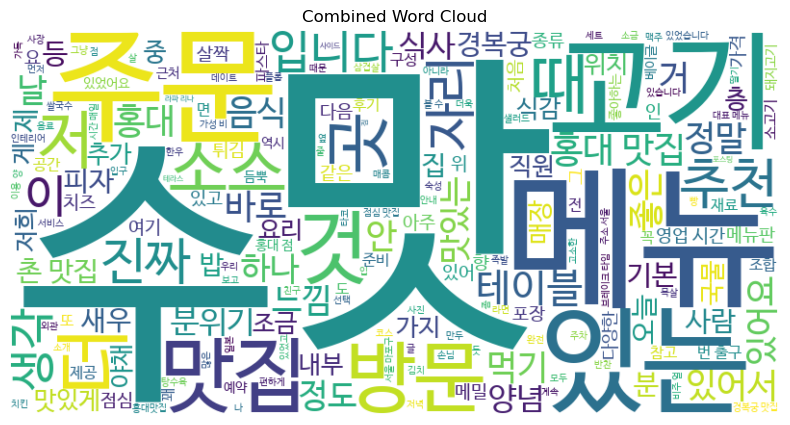

In [10]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from konlpy.tag import Okt
from collections import Counter
import re

font_path = './font/NanumBarunGothic.ttf'

# 데이터 로드
data = pd.read_excel('블로그내용크롤링_24-08-26.xlsx')
df = pd.DataFrame(data)

# NaN 값을 빈 문자열로 대체하고 모든 값을 문자열로 변환
df['내용'] = df['내용'].fillna('').astype(str)
df['태그'] = df['태그'].fillna('').astype(str)

# 1. 해시태그 빈도수 계산
hashtags = df['태그'].str.findall(r'#\w+').explode().tolist()
hashtags = [str(hashtag) for hashtag in hashtags]  # 모든 해시태그를 문자열로 변환

# 2. 자연어 텍스트 형태소 분석 (명사와 형용사 추출)
okt = Okt()

def extract_nouns_and_adjectives(text):
    # 명사와 형용사 추출
    nouns = okt.nouns(text)
    adjectives = [word for word, tag in okt.pos(text) if tag in ['Adjective']]
    return nouns + adjectives

text_data = ' '.join(df['내용'])
text_nouns_adjectives = extract_nouns_and_adjectives(text_data)

# 3. 해시태그와 자연어 텍스트 결합
combined_text = ' '.join(hashtags) + ' ' + ' '.join(text_nouns_adjectives)

# 4. 워드클라우드 생성
def create_wordcloud(text, title):
    wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# 결합된 텍스트로 워드클라우드 생성
create_wordcloud(combined_text, 'Combined Word Cloud')